# Text Mining Assignment

## Objective:-We want to analyze custumer review 

### Here we took reviews of iphone-12-128gb variant from amazon

In [1]:
from bs4 import BeautifulSoup as bs #Beautiful Soup is a Python library for pulling data out of HTML and XML files.
import requests # making HTTP requests in Python

In [2]:
bt='https://www.amazon.in'
ul='https://www.amazon.in/New-Apple-iPhone-12-128GB/product-reviews/B08L5TNJHG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [3]:
cust_name = []   #define list to store Name of the customers
review_title = []
rate = []
review_content = []

In [4]:
tt = 0
while tt == 0:
    page = requests.get(ul)
    while page.ok == False:#if it fails to connect then this loop will be executing continuously until get response from site  
        page = requests.get(ul)
   

    soup = bs(page.content,'html.parser')
    soup.prettify()       #Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the document.
    
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        ul = bt + A
    except:
        break

In [5]:
len(cust_name)

301

In [6]:
len(review_title)

301

In [7]:
len(review_content)

301

In [8]:
len(rate)

301

In [9]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

review_title[:] = [titles.rstrip('\n') for titles in review_title]

review_content[:] = [titles.lstrip('\n') for titles in review_content]

review_content[:] = [titles.rstrip('\n') for titles in review_content]

In [10]:
#!pip install -U textblob
#!python -m textblob.download_corpora
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob, Word, Blobber
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
df = pd.DataFrame()

In [12]:
df['Customer Name'] = cust_name
df['Review Title'] = review_title
df['Rating'] = rate
df['Reviews'] = review_content

In [13]:
df.head(10)

Customer Name                                       Review Title  \
0     Tarun barath                                      Worst battery   
1  S.Siva Ram Kris    Another Fabulous IPhone ( IPhone 12, Blue 64GB)   
2            Paras                                          The Beast   
3  Amazon Customer                          Kidney as a load balancer   
4    Chetan Pamini                       99.99% Perfect Smartphone !!   
5    Ayush taliyan                         NOW I ONLY HAVE ONE KIDNEY   
6           Elliot                                          Beast🤩🤩🤩🤩   
7      RakhuNathan                         Not Really worth the money   
8           Anupam  This phone is a joke and the joke is on us!!! ...   
9     ShahnajNihal              No one can better do iphone is iphone   

               Rating                                            Reviews  
0  3.0 out of 5 stars    Worst battery performance.Iphone 11 is far b...  
1  5.0 out of 5 stars    Your browser does not support HTML5 video.\n...  
2  5.0 out of 5 stars    This was my first switch to an ios device af...  
3  4.0 out of 5 stars    Sold kidney bought this, now not feeling wel...  
4  5.0 out of 5 stars    Nicely packed !! Kudos to seller !!I was ver...  
5  1.0 out of 5 stars    My girlfriend demanded me this iphone... And...  
6  4.0 out of 5 stars    Hello there,I am writing this review after 3...  
7  4.0 out of 5 stars    I have been an android user for the past 8+ ...  
8  1.0 out of 5 stars    Extremely disappointed with this phone. It’s...  
9  5.0 out of 5 stars    Same like the old classic iphone 5 lookBut n...

In [14]:
df.to_csv(r'D:\\Study\\Assignments\\Text Mining\\amazonreviews.csv',index = True)


In [15]:
data = pd.read_csv("D:\\Study\\Assignments\\Text Mining\\amazonreviews.csv",index_col=[0])

In [16]:
data.dtypes

Customer Name    object
Review Title     object
Rating           object
Reviews          object
dtype: object

In [17]:
data['Rating'] = [titles.rstrip(' out of 5 stars') for titles in data['Rating']]

In [18]:
data['Rating']

0      3.0
1      5.0
2      5.0
3      4.0
4      5.0
      ... 
296    4.0
297    5.0
298    5.0
299    4.0
300    3.0
Name: Rating, Length: 301, dtype: object

In [19]:
data['Rating'].value_counts(normalize=True)*100

5.0    73.421927
4.0    13.953488
1.0     5.647841
3.0     5.647841
2.0     1.328904
Name: Rating, dtype: float64

In [20]:
ratings=data.groupby(['Rating']).count()
ratings

Customer Name  Review Title  Reviews
Rating                                      
1.0                17            17       17
2.0                 4             4        4
3.0                17            17       17
4.0                42            42       42
5.0               221           221      221

In [21]:
plt.figure(figsize=(12,8))
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

Text(0, 0.5, 'Count')

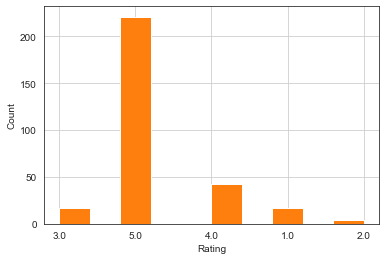

In [22]:
data.Rating.hist()
data.Rating.hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')

In [23]:
data.iloc[:,[3]]

Reviews
0      Worst battery performance.Iphone 11 is far b...
1      Your browser does not support HTML5 video.\n...
2      This was my first switch to an ios device af...
3      Sold kidney bought this, now not feeling wel...
4      Nicely packed !! Kudos to seller !!I was ver...
..                                                 ...
296    Pros:1) Display and camera quality is good f...
297    Awesome phone with great looks and great har...
298    Good but not good as iPhone 12 Pro  nice fla...
299    Just what one expects from an apple product....
300    I am using oneplus 7 pro , bought this as se...

[301 rows x 1 columns]

In [24]:

Reviews=data.iloc[:,[3]]

In [25]:
Reviews.shape

(301, 1)

In [26]:
Reviews.describe()

Reviews
count      301
unique     293
top       Good
freq         4

In [27]:
Reviews.dtypes

Reviews    object
dtype: object

In [28]:
# removing customer name and reviw title column as they have not that significance in output##
data.drop(["Customer Name","Review Title"],axis=1,inplace=True)

data.head()

Rating                                            Reviews
0    3.0    Worst battery performance.Iphone 11 is far b...
1    5.0    Your browser does not support HTML5 video.\n...
2    5.0    This was my first switch to an ios device af...
3    4.0    Sold kidney bought this, now not feeling wel...
4    5.0    Nicely packed !! Kudos to seller !!I was ver...

In [29]:
data.dropna(inplace=True)

In [30]:
## Cleaning the text input for betting understanding of Machine..##

##Converting all review into Lowercase..###
data['Reviews']= data['Reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [31]:
## removing punctuation from review..#
import string
data['Reviews']=data['Reviews'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [32]:
## Remove Numbers from review...##
data['Reviews']=data['Reviews'].str.replace('[0-9]','')

In [33]:
## removing all stopwords(english)....###
from nltk.corpus import stopwords

In [34]:
stop_words=stopwords.words('english')

In [35]:
data['Reviews']=data['Reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))


In [36]:
data

Rating                                            Reviews
0      3.0  worst battery performanceiphone far better den...
1      5.0  browser support html video another beauty appl...
2      5.0  first switch ios device using android untill d...
3      4.0  sold kidney bought feeling well number days al...
4      5.0  nicely packed kudos seller much confused iphon...
..     ...                                                ...
296    4.0  pros display camera quality good price super f...
297    5.0  awesome phone great looks great hardware go wi...
298    5.0  good good iphone pro nice flagship nice phone ...
299    4.0                   one expects apple product smooth
300    3.0  using oneplus pro bought secondary ph camera p...

[301 rows x 2 columns]

In [37]:
from textblob import Word
data['Reviews']= data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data['Reviews']= data['Reviews'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [38]:
data['Reviews'].head()

0    worst battery performanceiphone far better den...
1    browser support html video another beauty appl...
2    first switch io device using android untill di...
3    sold kidney bought feeling well number day ali...
4    nicely packed kudos seller much confused iphon...
Name: Reviews, dtype: object

In [39]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(data['Reviews'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

     aaa  able  abovepros  absolutely  abt  acceptable  accessory  account  \
0      0     0          0           0    0           0          0        0   
1      0     0          0           0    0           0          1        0   
2      0     1          0           0    0           0          0        0   
3      0     0          0           0    0           0          0        0   
4      0     0          0           0    0           0          0        0   
..   ...   ...        ...         ...  ...         ...        ...      ...   
296    0     0          0           0    0           0          0        0   
297    0     0          0           0    0           0          0        0   
298    0     0          0           0    0           0          0        0   
299    0     0          0           0    0           0          0        0   
300    0     0          0           0    0           0          0        0   

     accurate  active  ...  yes  yesterday  yet  you  youoveral

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(data['Reviews'])
print(TFIDF)

  (0, 1201)	0.19569986902932776
  (0, 1213)	0.18419886097885807
  (0, 195)	0.19361553595108447
  (0, 443)	0.22938759383353588
  (0, 1124)	0.3448674141770252
  (0, 283)	0.23334177144063006
  (0, 720)	0.24217658514173196
  (0, 1582)	0.3448674141770252
  (0, 405)	0.3448674141770252
  (0, 138)	0.20245034965218642
  (0, 549)	0.24217658514173196
  (0, 1133)	0.3448674141770252
  (0, 117)	0.2640640831881607
  (0, 1747)	0.28190282063127753
  (1, 1421)	0.07095179941807339
  (1, 237)	0.0421532522900795
  (1, 1033)	0.057997687118541356
  (1, 914)	0.07095179941807339
  (1, 767)	0.07095179941807339
  (1, 981)	0.07095179941807339
  (1, 1199)	0.05618004386247292
  (1, 1134)	0.07095179941807339
  (1, 749)	0.05321670969989007
  (1, 393)	0.05321670969989007
  (1, 307)	0.07095179941807339
  :	:
  (298, 561)	0.2318113203292411
  (298, 794)	0.4045071948704577
  (299, 522)	0.6781206690807514
  (299, 1063)	0.3523886301011357
  (299, 1453)	0.4305032338091041
  (299, 70)	0.31536768313970276
  (299, 1213)	0.3621

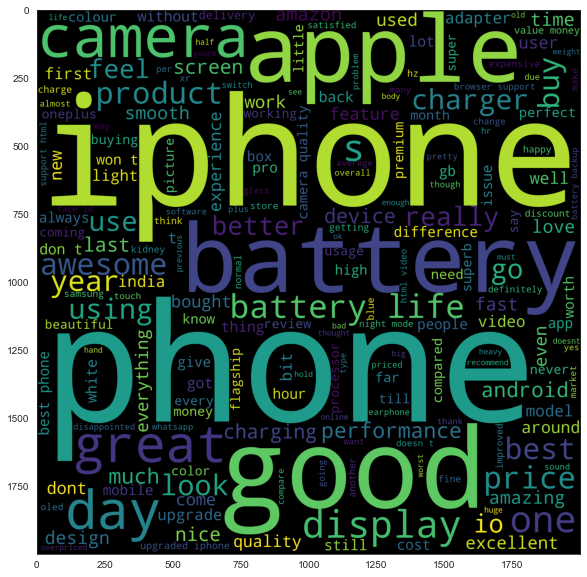

In [41]:

Review_wordcloud = ' '.join(data['Reviews'])
Q_wordcloud=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

# Removing Punctuation
The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.

In [42]:
data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','')
data['Reviews'].head()

0    worst battery performanceiphone far better den...
1    browser support html video another beauty appl...
2    first switch io device using android untill di...
3    sold kidney bought feeling well number day ali...
4    nicely packed kudos seller much confused iphon...
Name: Reviews, dtype: object

#  Common word removal
Previously, we just removed commonly occurring words in a general sense. We can also remove commonly occurring words from our text data First, let’s check the 10 most frequently occurring words in our text data then take call to remove or retain.

In [43]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[:10]
freq

phone      184
iphone     171
battery    119
good       101
camera      70
apple       67
day         49
life        47
best        46
display     45
dtype: int64

# Now, let’s remove these words as their presence will not of any use in classification of our text data.

In [44]:

data['Reviews'] = data['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Reviews'].head()


0    worst performanceiphone far better den thisin ...
1    browser support html video another beauty upgr...
2    first switch io device using android untill di...
3    sold kidney bought feeling well number alive o...
4    nicely packed kudos seller much confused one p...
Name: Reviews, dtype: object

#  Rare words removal
Similarly, just as we removed the most common words, this time let’s remove rarely occurring words from the text. Because they’re so rare, the association between them and other words is dominated by noise. You can replace rare words with a more general form and then this will have higher counts

In [45]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[-10:]
freq


careful              1
million              1
connectorslightly    1
daytips              1
importance           1
updatehave           1
toog                 1
scratchy             1
otherwise            1
bpught               1
dtype: int64

In [46]:
from textblob import TextBlob
data['Reviews'][:10].apply(lambda x: str(TextBlob(x).correct()))

0    worst performanceiphone far better den this ho...
1    brother support html video another beauty upgr...
2    first switch to device using andros until disa...
3    sold kidney bought feeling well number alive o...
4    nicely packed buds seller much confused one pr...
5    girlfriend demanded unloading pick new boyfrie...
6    hello there writing review usage beast term of...
7    andros user past year recently using past mont...
8    extremely disappointed its seemingly average p...
9    like old classic lookout difference inch ironi...
Name: Reviews, dtype: object

# 2.7 Tokenization
Tokenization refers to dividing the text into a sequence of words or sentences. In our example, we have used the textblob library to first transform our reviews into a blob and then converted them into a series of words.

In [47]:
TextBlob(data['Reviews'][0]).words

WordList(['worst', 'performanceiphone', 'far', 'better', 'den', 'thisin', 'hour', 'come', 'percentplease', 'dont', 'buy', 'product', 'price'])

In [48]:
TextBlob(data['Reviews'][1]).words

WordList(['browser', 'support', 'html', 'video', 'another', 'beauty', 'upgraded', 'great', 'experience', 'latest', 'spec', 'flawlessly', 'smooth', 'thanks', 'new', 'bionic', 'chipbuild', 'quality', 'great', 'always', 'applephone', 'feel', 'light', 'hand', 'due', 'aluminium', 'body', 'chose', 'blue', 'colour', 'wanted', 'go', 'different', 'colour', 'routine', 'black', 'white', 'iphones', 'initially', 'bit', 'skeptical', 'seeing', 'person', 'im', 'happy', 'blue', 'colour', 'bad', 'flashygrip', 'feel', 'perfect', 'come', 'io', 'quality', 'excellent', 'sufficient', 'normal', 'userif', 'io', 'ecosystem', 'nothing', 'go', 'wrong', 'herethere', 'nothing', 'question', 'quality', 'interface', 'its', 'personal', 'opinion', 'long', 'time', 'useras', 'know', 'wont', 'come', 'earphone', 'charging', 'brick', 'adapteri', 'bought', 'separately', 'adapter', 'new', 'india', 'online', 'store', 'rsi', 'dont', 'judge', 'accessory', 'removal', 'price', 'tag', 'hope', 'justify', 'thisi', 'hope', 'wanted', 's

# Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library.

In [49]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Reviews'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    worst performanceiphon far better den thisin h...
1    browser support html video anoth beauti upgrad...
2    first switch io devic use android until disapp...
3    sold kidney bought feel well number aliv one k...
4    nice pack kudo seller much confus one price dr...
5    girlfriend demand upload pic new boyfriend wit...
6    hello therei write review usag beast term ofme...
7    android user past year recent use past month l...
8    extrem disappoint it seemingli averag price ti...
9    like old classic lookbut differ inch bionic ch...
Name: Reviews, dtype: object

# Lemmatization
Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [50]:
from textblob import Word
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Reviews'].head()


0    worst performanceiphone far better den thisin ...
1    browser support html video another beauty upgr...
2    first switch io device using android untill di...
3    sold kidney bought feeling well number alive o...
4    nicely packed kudos seller much confused one p...
Name: Reviews, dtype: object

# Advance Text Processing
Up to this point, we have done all the basic pre-processing steps in order to clean our data. Now, we can finally move on to extracting features using NLP techniques.

 
# N-grams
N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.

Unigrams do not usually contain as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one. The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.

In [51]:
TextBlob(data['Reviews'][0]).ngrams(2)

[WordList(['worst', 'performanceiphone']),
 WordList(['performanceiphone', 'far']),
 WordList(['far', 'better']),
 WordList(['better', 'den']),
 WordList(['den', 'thisin']),
 WordList(['thisin', 'hour']),
 WordList(['hour', 'come']),
 WordList(['come', 'percentplease']),
 WordList(['percentplease', 'dont']),
 WordList(['dont', 'buy']),
 WordList(['buy', 'product']),
 WordList(['product', 'price'])]

# Term frequency
Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

Therefore, we can generalize term frequency as:

TF = (Number of times term T appears in the particular row) / (number of terms in that row)

In [52]:
tf1 = (data['Reviews'][1:10]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

words   tf
0         india  4.0
1       iphones  4.0
2         video  4.0
3          come  5.0
4        colour  3.0
..          ...  ...
474  difference  1.0
475     lookbut  1.0
476        inch  1.0
477         old  1.0
478     classic  1.0

[479 rows x 2 columns]

# Inverse Document Frequency
The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.

In [53]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Reviews'].str.contains(word)])))

In [54]:
tf1

words   tf       idf
0         india  4.0  3.222204
1       iphones  4.0  3.915351
2         video  4.0  2.662588
3          come  5.0  3.068053
4        colour  3.0  3.142161
..          ...  ...       ...
474  difference  1.0  3.509886
475     lookbut  1.0  5.707110
476        inch  1.0  4.320816
477         old  1.0  2.711378
478     classic  1.0  4.608498

[479 rows x 3 columns]

The more the value of IDF, the more unique is the word.

# Term Frequency – Inverse Document Frequency (TF-IDF)
TF-IDF is the multiplication of the TF and IDF which we calculated above.

In [55]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

words   tf       idf      tfidf
0         india  4.0  3.222204  12.888814
1       iphones  4.0  3.915351  15.661403
2         video  4.0  2.662588  10.650351
3          come  5.0  3.068053  15.340265
4        colour  3.0  3.142161   9.426483
..          ...  ...       ...        ...
474  difference  1.0  3.509886   3.509886
475     lookbut  1.0  5.707110   5.707110
476        inch  1.0  4.320816   4.320816
477         old  1.0  2.711378   2.711378
478     classic  1.0  4.608498   4.608498

[479 rows x 4 columns]

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
data_vect = tfidf.fit_transform(data['Reviews'])

data_vect

<301x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 3390 stored elements in Compressed Sparse Row format>

# Bag of Words
Bag of Words (BoW) refers to the representation of text which describes the presence of words within the text data. The intuition behind this is that two similar text fields will contain similar kind of words, and will therefore have a similar bag of words. Further, that from the text alone we can learn something about the meaning of the document.

For implementation, sklearn provides a separate function for it as shown below

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Reviews'])
data_bow

<301x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 3843 stored elements in Compressed Sparse Row format>

# Sentiment Analysis
If you recall, our problem was to detect the sentiment of the tweet. So, before applying any ML/DL models (which can have a separate feature detecting the sentiment using the textblob library), let’s check the sentiment of the first few tweets.

In [58]:
data['Reviews'][:10].apply(lambda x: TextBlob(x).sentiment)

0    (-0.13333333333333333, 0.8333333333333334)
1     (0.16224747474747478, 0.5391511266511266)
2      (0.2642857142857143, 0.6022108843537415)
3                                 (0.255, 0.63)
4     (0.38482683982683985, 0.6496608946608946)
5    (-0.18181818181818182, 0.7272727272727273)
6    (-0.017361111111111088, 0.388888888888889)
7     (0.22231182795698926, 0.5622759856630825)
8    (-0.12063492063492061, 0.3873931623931624)
9    (0.13333333333333333, 0.18333333333333335)
Name: Reviews, dtype: object

# Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. This can also work as a feature for building a machine learning model.

In [59]:
data['sentiment'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Reviews','sentiment']].head()

Reviews  sentiment
0  worst performanceiphone far better den thisin ...  -0.133333
1  browser support html video another beauty upgr...   0.162247
2  first switch io device using android untill di...   0.264286
3  sold kidney bought feeling well number alive o...   0.255000
4  nicely packed kudos seller much confused one p...   0.384827

# Word Embeddings
Word Embedding is the representation of text in the form of vectors. The underlying idea here is that similar words will have a minimum distance between their vectors.

Word2Vec models require a lot of text, so either we can train it on our training data or we can use the pre-trained word vectors developed by Google, Wiki, etc.

In [60]:
#!pip install gensim
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [61]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'negative-words.txt'
word2vec_output_file = 'positive-word.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(4818, 0)

In [62]:

import collections
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tanma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
from textblob import TextBlob
data['polarity'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0])
data[['Reviews','polarity']].head(5)

Reviews  polarity
0  worst performanceiphone far better den thisin ... -0.133333
1  browser support html video another beauty upgr...  0.162247
2  first switch io device using android untill di...  0.264286
3  sold kidney bought feeling well number alive o...  0.255000
4  nicely packed kudos seller much confused one p...  0.384827

In [64]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

Rating                                            Reviews  sentiment  \
1    5.0  browser support html video another beauty upgr...   0.162247   
2    5.0  first switch io device using android untill di...   0.264286   
3    4.0  sold kidney bought feeling well number alive o...   0.255000   
4    5.0  nicely packed kudos seller much confused one p...   0.384827   
7    4.0  android user past year recently using past mon...   0.222312   

   polarity  
1  0.162247  
2  0.264286  
3  0.255000  
4  0.384827  
7  0.222312

In [65]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [66]:
sent_type(data['polarity'])

negative
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
neutral
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
neutral
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
neutral
positive
neutral
positive
neutral
positive
positi

In [67]:
data["category"]=data['polarity']

In [68]:
data.loc[data.category > 0,'category']="Positive"
data.loc[data.category !='Positive','category']="Negative"

In [69]:
data["category"]=data["category"].astype('category')
data.dtypes

Rating         object
Reviews        object
sentiment     float64
polarity      float64
category     category
dtype: object

<AxesSubplot:xlabel='category', ylabel='count'>

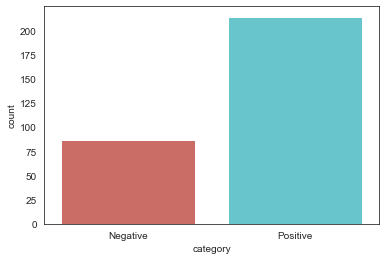

In [70]:
sns.countplot(x='category',data=data,palette='hls')

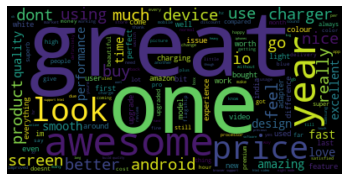

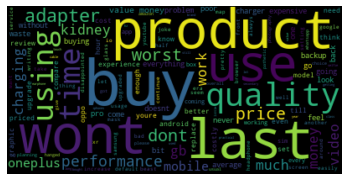

In [71]:
positive_reviews= data[data.category=='Positive']
negative_reviews= data[data.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Reviews.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Reviews.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()

In [72]:
#Percentage of positive review
data.category.value_counts(normalize=True).mul(100)

Positive    71.096346
Negative    28.903654
Name: category, dtype: float64

# Conclusion:-We got the 71% positive review of Apple Iphone12, 128gb variant